**TARGET ENCODING exercise**

In [1]:
# load data
import pandas as pd
df = pd.read_csv('../../../data/ames.csv')

In [2]:
# Select features
df.select_dtypes(['object']).nunique().sort_values(ascending=False).head(5)

Neighborhood    28
Exterior2nd     17
MSSubClass      16
Exterior1st     16
SaleType        10
dtype: int64

In [3]:
# SaleType
df.SaleType.value_counts()

SaleType
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

In [4]:
# Sample of data
X_encode = df.sample(frac=0.25, random_state=0)
y_encode = X_encode.pop('SalePrice')

X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop('SalePrice')

In [5]:
# apply m-estimate encoding
from category_encoders import MEstimateEncoder


encoder = MEstimateEncoder(['Neighborhood'], m=5)
encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

/var/folders/ss/8t40j75527v3c6rlj37_lltc0000gn/T/ipykernel_9787/2885389570.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train, kde=True, hist=True)
/var/folders/ss/8t40j75527v3c6rlj37_lltc0000gn/T/ipykernel_9787/2885389570.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_

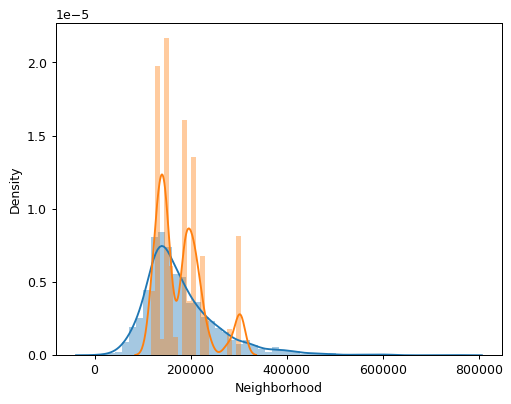

In [20]:
# Represents how the encoded feature align with the target (SalePrice)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=True)
ax = sns.distplot(X_train.Neighborhood, ax=ax)

# ax = sns.distplot(y_train, kde=True, hist=False)
# ax = sns.displot(X_train[encoder.cols], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
# ax.set_xlabel('SalePrice')

In [21]:
# Is informative the encoding?
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


X_1 = df.copy()
y_1 = X_1.pop('SalePrice')
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

score_base = score_dataset(X_1, y_1)
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")


Baseline Score: 0.1434 RMSLE
Score with Encoding: 0.1473 RMSLE
